# Module 02: Introduction to Theoretical Analysis

CSCI304: Analysis and Design of Algorithms<br>
Nile University<br>
Ammar Sherif

Right now, it is assumed you have gone through the [**slides**](https://github.com/ammarSherif/Analysis-and-Design-of-Algorithms-Tutorials/blob/main/Module%2002:%20Introduction%20to%20Theoretical%20Analysis/Module%2002:%20Introduction%20to%20Theoretical%20Analysis.pdf) of Module 2. Here, we try to do some analysis for Non-Recursive Algorithms

## Non-Recursive Complexity Analysis

In [2]:
def getSum(A):
    result = 0      # Assume it takes a_0 units of time
    for i in A:
        result += i # Assume a particular piece of the reapeted work takes a_1 units of time
    return result   # takes a_2 units

In [3]:
getSum([1,2,3,4,5,6,7,8])

36

To compute the time consumed by the algorithm accurately, we might proceed as follows: 
\begin{align*}
    \text{Time } (T) &= \underbrace{a_0}_{\text{initialization}} + \underbrace{\sum_{i \in A} a_1}_{\text{repeated work}} + \underbrace{a_2}_{\text{return}}\\
    &= a_0 + \underbrace{\sum_{k=1}^{n}}_{\text{assuming $n$ items}} a_1 + a_2\\
    &= a_0 + a_2 + a_1 \sum_{k=1}^{n} (1)\\
    &= \boxed{c + a_1 n}
\end{align*}

Nevertheless, because we care most about the **growth** rather than the exact formula, we analyize the algorithms as follows:
\begin{align*}
    \text{Time } (T) &= \underbrace{\Theta(1)}_{\text{constant time}} + \underbrace{\sum_{i \in A} \Theta(1)}_{\text{repeated work}}\\
    &= \Theta(1) + \sum_{k=1}^{n} \Theta(1)\\
    &= \Theta(1) + n \Theta(1) = \Theta(1) + \Theta(n)\\
    &= \boxed{\Theta(n)} = \mathcal{O}(n)
\end{align*}

In [4]:
# feel free to import what you want

# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import time

In [5]:
times = []
A = []
for i in range(1,500):
    A.append(i)
    start_time = time.time()
    getSum(A)
    times.append( (time.time() - start_time)*(10**9) )

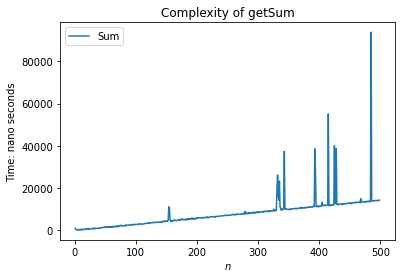

In [6]:
# the code to plot the curve

# Plot the two rates in the same figure
f,ax = plt.subplots()
ax.plot(range(1,500),times,label='Sum')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of getSum')
ax.legend(loc=0);

### Wrong Thought
While abstracting our calculations of the required time, we merged the initialization and the return time into one term, $\Theta(1)$; as follows:
$$\Theta(1) = \underbrace{\Theta(1)}_{\text{initialization}} + \underbrace{\Theta(1)}_{\text{return}}$$
Therefore, what about this reasoning:
$$\sum_{k=1}^{n} \Theta(1) = \overbrace{\Theta(1) + \Theta(1) + \Theta(1) + \cdots + \Theta(1)}^{ n \text{ times}} \stackrel{??}{=} \Theta(1)$$
This is wrong because the number of constants depends on the input $n$&mdash;that is **variable**&mdash;therefore, there would be a variable number of constants, so it changes with changing the input producing $\Theta(n)$ not $\Theta(1)$

## Brute Force Algorithms

A simple technique that tries every possible solution.
- might be a good starting point for further enhancements
- mostly inefficient

### Maximum item of an array

In [7]:
def maxVal(A):
    """
    The Algorithm returns the maximum value in the list
    
    Input constraints: A is not empty
    """
    
    for maxV in A:
        found = True
        for item in A:
            if item > maxV:
                found = False
        if found:
            return maxV

In [8]:
maxVal([3,1,11,9,12,-20])

12

\begin{align*}
    \text{Worst-case time }T &= \sum_{m \in A} \sum_{i \in A} \mathcal{O}(1) + \mathcal{O}(1)\\
    &= \sum_{j = 1}^{n} \sum_{k = 1}^{n} \mathcal{O}(1) + \mathcal{O}(1)\\
    &= c \sum_{j = 1}^{n} \overbrace{(n - 1 + 1)}^{n} + \mathcal{O}(1)\\
    &= c \cdot n \sum_{j = 1}^{n} 1+ \mathcal{O}(1)\\
    &= c \cdot n \cdot n + \mathcal{O}(1) = \mathcal{O}(n^2) + \mathcal{O}(1)\\ 
    &= \mathcal{O}(n^2)\\
\end{align*}

### Cryptography
List all the possible keys, and try them

In [9]:
def bruteForceEff(key):
    """
    The Algorithm returns the number of checks until reaching the valid key
    
    Input constraints: key is a four digit key [----] where every digit is [0-9]
    """
#     k = int(key)
#     count = 0
#     for a in range(0,10):
#         for b in range(0,10):
#             for c in range(0,10):
#                 for d in range(0,10):
#                     count+=1
#                     value = a*1000 + b * 100 + c * 10 + d
#                     if value == k:
#                         return count
    digits = "0123456789"
    count = 0
    for a in digits:
        for b in digits:
            for c in digits:
                for d in digits:
                    count+=1
                    value = a + b + c  + d
                    if value == key:
                        return count

In [10]:
bruteForceEff("0000")

1